In [1]:
import pandas as pd

train_data = pd.read_csv('./train.csv') #read data
test_data = pd.read_csv('./test.csv')

In [2]:
train_data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [3]:
train_data.shape

(891, 12)

In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [5]:
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

## import python lib for visualization

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set() # setting seaborn default for plots

## Bar Chart for categorical Features
- Pclass
- Sex
- SibSp(# of siblings and spouse)
- Parch(# of parents and childeren)
- Embarked
- Cabin

In [7]:
def bar_chart(feature):
    survived = train_data[train_data['Survived']==1][feature].value_counts()
    dead = train_data[train_data['Survived']==0][feature].value_counts()
    df = pd.DataFrame([survived,dead])
    df.index = ['Survived','Dead']
    df.plot(kind='bar',stacked=True,figsize=(10,5))

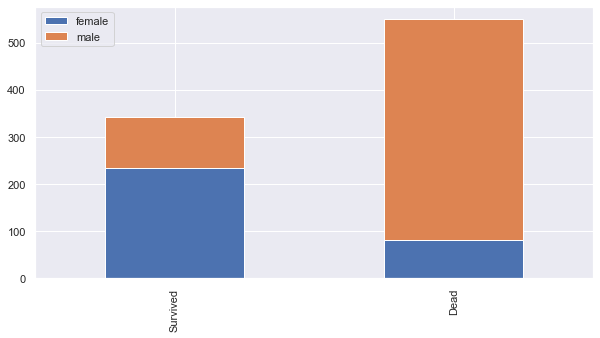

In [8]:
bar_chart('Sex')# female is more survived

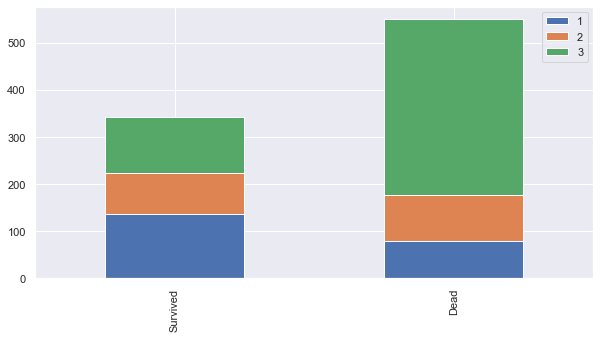

In [9]:
bar_chart('Pclass') # first class is more survived and most of third class is dead

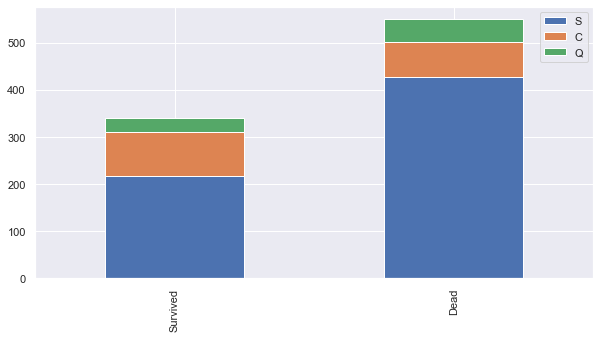

In [10]:
bar_chart('Embarked')

The chart confirms **a person aboarded from C** slightly more likely survived  
The chart confirms **a person aboarded from Q** more likely dead

## Feature engineering  
Feature engineering is the process of using domain knowledege of the data  
to create features (**feature vectors**) that make machine learning alogrithms work.  
  
feature vector is an n-dimensional vector of numerical features that represent some objects.  
Many machine learning algorithms require a numerical representation of object,  
since such representations facilites processing and statistical analysis.

In [11]:
train_data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


## how titanic sank?
sank from the bow of the shipt where third class rooms located  
conclusion, Pclass is key feature for classifier

## Name

In [12]:
train_test_data = [train_data,test_data]

for dataset in train_test_data:
    dataset['Title'] = dataset['Name'].str.extract('([A-Za-z]+)\.',expand=False)

In [13]:
test_data['Title'].value_counts()
train_data['Title'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Col           2
Mlle          2
Major         2
Countess      1
Mme           1
Jonkheer      1
Sir           1
Lady          1
Don           1
Capt          1
Ms            1
Name: Title, dtype: int64

In [14]:
title_mapping = {"Mr":0,"Miss":1,"Mrs":2,"Master":3,"Dr":3,"Rev":3,"Col":3,"Major":3,"Mlle":3,"Countess":3,"Ms":3,"Lady":3,"Jonkheer":3,
                "Don":3,"Dona":3,"Mme":3,"Capt":3,"Sir":3}

for dataset in train_test_data:
    dataset['Title']= dataset['Title'].map(title_mapping)

In [15]:
train_data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,0
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,0
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,3
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,2
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,2


In [16]:
test_data.head(10)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,2
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,2
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S,0
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q,1
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S,0
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C,2
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S,0


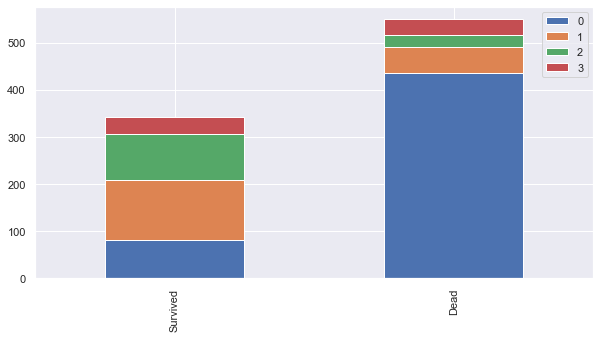

In [17]:
bar_chart('Title')

The bar-chart confirms a person who has **Mrs** title more likely survived

In [18]:
# delete unnecessary feature from dataset
train_data.drop('Name',axis=1,inplace=True)
test_data.drop('Name',axis=1,inplace=True)

In [19]:
train_data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S,0


In [20]:
test_data.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,female,47.0,1,0,363272,7.0000,NaN,S,2
2,894,2,male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,female,22.0,1,1,3101298,12.2875,NaN,S,2


## Sex
male: 0 female:1

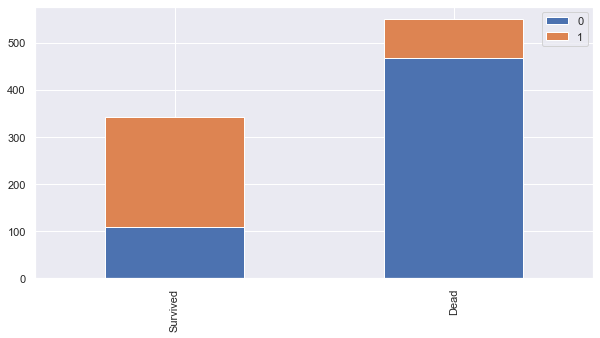

In [21]:
sex_mapping = {'female':1,'male':0}

for dataset in train_test_data:
    dataset['Sex'] = dataset['Sex'].map(sex_mapping)
    
bar_chart('Sex')

## Age

#### 1. some age is missing
Let's use Title's median age for missing Age

In [22]:
train_data.head(10)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,1,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,1,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,0,35.0,0,0,373450,8.0500,NaN,S,0
5,6,0,3,0,NaN,0,0,330877,8.4583,NaN,Q,0
6,7,0,1,0,54.0,0,0,17463,51.8625,E46,S,0
7,8,0,3,0,2.0,3,1,349909,21.0750,NaN,S,3
8,9,1,3,1,27.0,0,2,347742,11.1333,NaN,S,2
9,10,1,2,1,14.0,1,0,237736,30.0708,NaN,C,2


In [23]:
#fill missing age with median age for each title (Mr, Mrs, Miss, Others)
train_data['Age'].fillna(train_data.groupby('Title')['Age'].transform('median'),inplace = True)
test_data['Age'].fillna(test_data.groupby('Title')['Age'].transform('median'),inplace =True)


In [24]:
train_data.head(10)
train_data.groupby('Title')['Age'].transform('median')

0      30.0
1      35.0
2      21.0
3      35.0
4      30.0
5      30.0
6      30.0
7       9.0
8      35.0
9      35.0
10     21.0
11     21.0
12     30.0
13     30.0
14     21.0
15     35.0
16      9.0
17     30.0
18     35.0
19     35.0
20     30.0
21     30.0
22     21.0
23     30.0
24     21.0
25     35.0
26     30.0
27     30.0
28     21.0
29     30.0
       ... 
861    30.0
862    35.0
863    21.0
864    30.0
865    35.0
866    21.0
867    30.0
868    30.0
869     9.0
870    30.0
871    35.0
872    30.0
873    30.0
874    35.0
875    21.0
876    30.0
877    30.0
878    30.0
879    35.0
880    35.0
881    30.0
882    21.0
883    30.0
884    30.0
885    35.0
886     9.0
887    21.0
888    21.0
889    30.0
890    30.0
Name: Age, Length: 891, dtype: float64

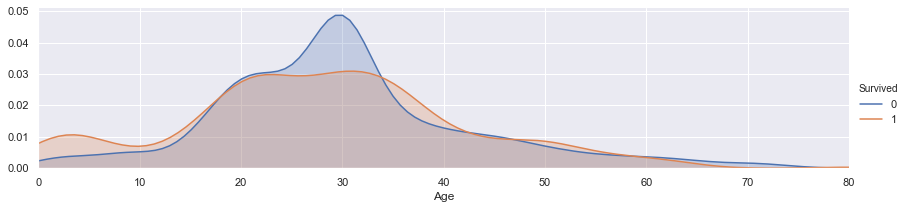

In [25]:
facet = sns.FacetGrid(train_data,hue='Survived',aspect=4)
facet.map(sns.kdeplot,'Age',shade= True)
facet.set(xlim=(0,train_data['Age'].max()))
facet.add_legend()

plt.show()

(0, 20)

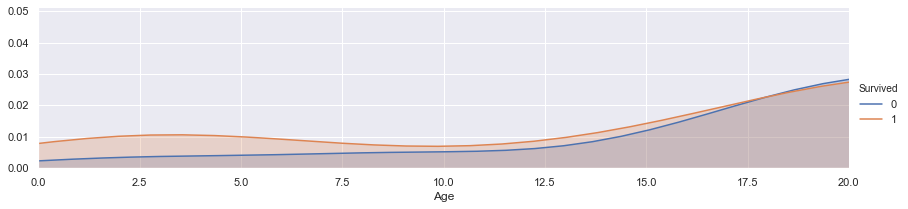

In [26]:
facet = sns.FacetGrid(train_data,hue='Survived',aspect=4)
facet.map(sns.kdeplot,'Age',shade= True)
facet.set(xlim=(0,train_data['Age'].max()))
facet.add_legend()
plt.xlim(0,20)

(20, 33)

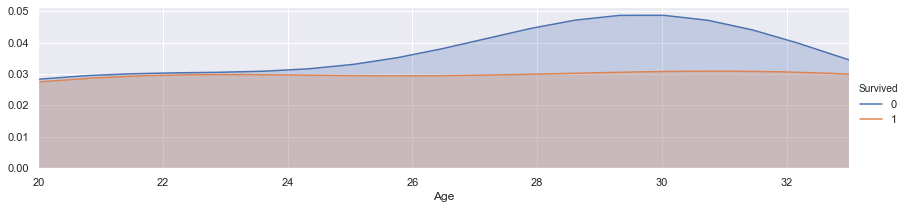

In [27]:
facet = sns.FacetGrid(train_data,hue='Survived',aspect=4)
facet.map(sns.kdeplot,'Age',shade= True)
facet.set(xlim=(0,train_data['Age'].max()))
facet.add_legend()
plt.xlim(20,33)

(33, 40)

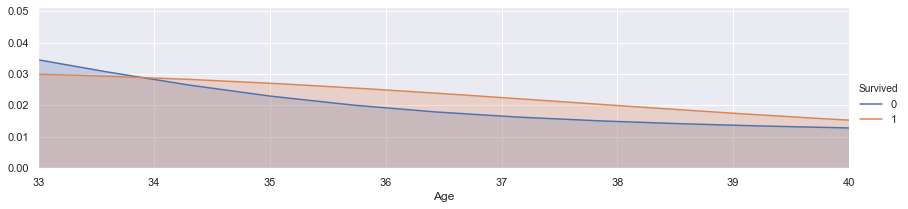

In [28]:
facet = sns.FacetGrid(train_data,hue='Survived',aspect=4)
facet.map(sns.kdeplot,'Age',shade= True)
facet.set(xlim=(0,train_data['Age'].max()))
facet.add_legend()
plt.xlim(33,40)

(40, 60)

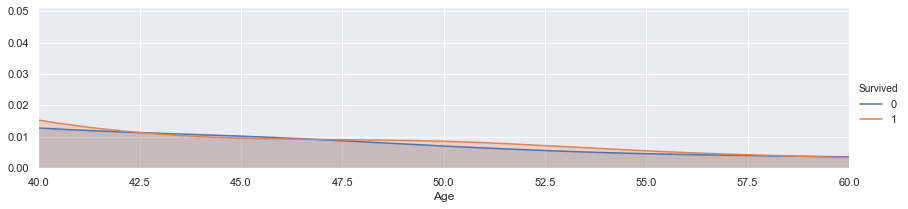

In [29]:
facet = sns.FacetGrid(train_data,hue='Survived',aspect=4)
facet.map(sns.kdeplot,'Age',shade= True)
facet.set(xlim=(0,train_data['Age'].max()))
facet.add_legend()
plt.xlim(40,60)

(60, 80)

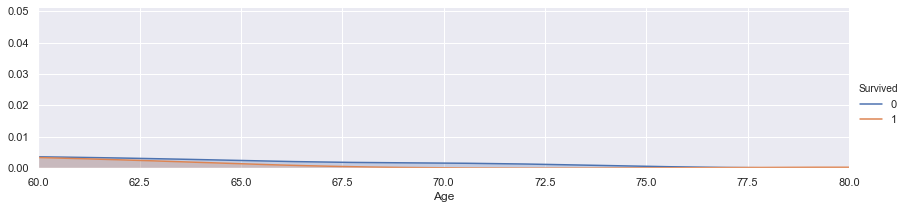

In [30]:
facet = sns.FacetGrid(train_data,hue='Survived',aspect=4)
facet.map(sns.kdeplot,'Age',shade= True)
facet.set(xlim=(0,train_data['Age'].max()))
facet.add_legend()
plt.xlim(60,80)

In [31]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Sex            891 non-null int64
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
Title          891 non-null int64
dtypes: float64(2), int64(7), object(3)
memory usage: 83.6+ KB


#### 2. Binning
Binning/Converting Numerical Age to Categorical Variable  

feature vector map:  
child:0   
young:1  
adult:2  
mid-age:3  
senior:4  

In [32]:
for dataset in train_test_data:
    dataset.loc[dataset['Age']<=16,'Age']=0
    dataset.loc[(dataset['Age']>16) & (dataset['Age']<=26),'Age']=1    
    dataset.loc[(dataset['Age']>26) & (dataset['Age']<=36) ,'Age']=2    
    dataset.loc[(dataset['Age']>36) & (dataset['Age']<=62),'Age']=3
    dataset.loc[dataset['Age']>62,'Age']=4

In [33]:
train_data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,1.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,1,3.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,1,2.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,0,2.0,0,0,373450,8.0500,NaN,S,0


In [34]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Sex            418 non-null int64
Age            418 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
Title          418 non-null int64
dtypes: float64(2), int64(6), object(3)
memory usage: 36.0+ KB


## Embarked
filling missing values in embarked cols

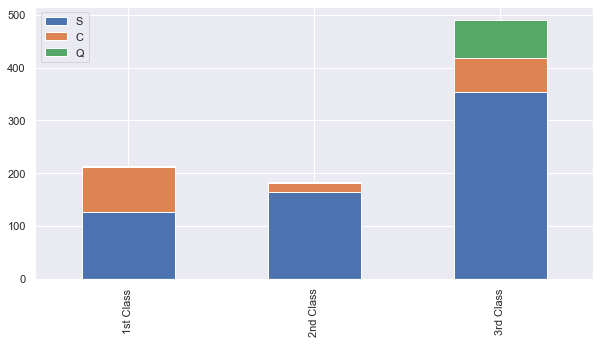

In [35]:
Pclass1 = train_data[train_data['Pclass']==1]['Embarked'].value_counts()
Pclass2 = train_data[train_data['Pclass']==2]['Embarked'].value_counts()
Pclass3 = train_data[train_data['Pclass']==3]['Embarked'].value_counts()

df = pd.DataFrame([Pclass1,Pclass2,Pclass3])
df.index = ['1st Class','2nd Class','3rd Class']
df.plot(kind='bar',figsize=(10,5),stacked=True)

most of class is S

In [36]:
for dataset in train_test_data:
    dataset['Embarked']= dataset['Embarked'].fillna('S')

In [37]:
train_data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,1.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,1,3.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,1,2.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,0,2.0,0,0,373450,8.0500,NaN,S,0


In [38]:
Embarked_mapping = {"S":0,'C':1,'Q':2}
for dataset in train_test_data:
    dataset['Embarked']= dataset['Embarked'].map(Embarked_mapping)

#### Fare

In [39]:
train_data['Fare'].fillna(train_data.groupby('Pclass')['Fare'].transform('median'),inplace=True)
test_data['Fare'].fillna(test_data.groupby('Pclass')['Fare'].transform('median'),inplace=True)
train_data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,1.0,1,0,A/5 21171,7.2500,NaN,0,0
1,2,1,1,1,3.0,1,0,PC 17599,71.2833,C85,1,2
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,7.9250,NaN,0,1
3,4,1,1,1,2.0,1,0,113803,53.1000,C123,0,2
4,5,0,3,0,2.0,0,0,373450,8.0500,NaN,0,0


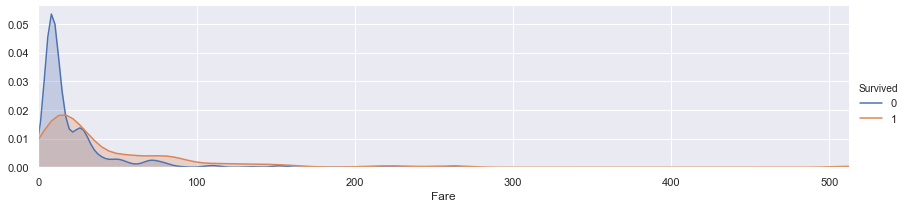

In [40]:
facet = sns.FacetGrid(train_data,hue='Survived',aspect=4)
facet.map(sns.kdeplot,'Fare',shade=True)
facet.set(xlim=(0,train_data['Fare'].max()))
facet.add_legend()

plt.show()

(0, 30)

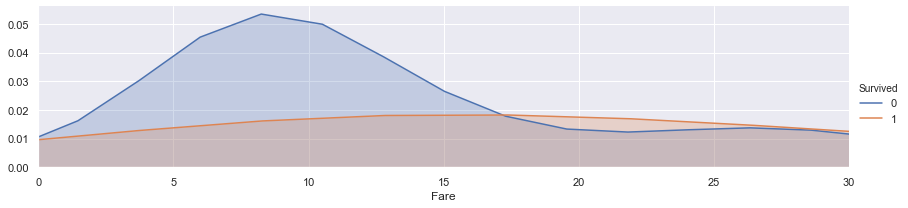

In [41]:
facet = sns.FacetGrid(train_data,hue='Survived',aspect=4)
facet.map(sns.kdeplot,'Fare',shade=True)
facet.set(xlim=(0,train_data['Fare'].max()))
facet.add_legend()

plt.xlim(0,30)

In [42]:
for dataset in train_test_data:
    dataset.loc[train_data['Fare']<=17,'Fare']=0
    dataset.loc[train_data['Fare']>17 & (train_data['Fare']<=30),'Fare']=1    
    dataset.loc[train_data['Fare']>30 & (train_data['Fare']<=100),'Fare']=2    
    dataset.loc[train_data['Fare']>100,'Fare']=3

In [43]:
train_data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,1.0,1,0,A/5 21171,0.0,NaN,0,0
1,2,1,1,1,3.0,1,0,PC 17599,2.0,C85,1,2
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,0.0,NaN,0,1
3,4,1,1,1,2.0,1,0,113803,2.0,C123,0,2
4,5,0,3,0,2.0,0,0,373450,0.0,NaN,0,0


## Cabin

In [44]:
train_data['Cabin'].value_counts()

B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
D              3
E101           3
F2             3
F33            3
B35            2
E8             2
D17            2
B58 B60        2
B22            2
F G73          2
C68            2
C65            2
C126           2
C125           2
B77            2
C123           2
E25            2
C83            2
D33            2
C124           2
C93            2
D36            2
C2             2
E44            2
B51 B53 B55    2
C78            2
              ..
C46            1
D37            1
A26            1
B73            1
C110           1
D21            1
C54            1
B50            1
B38            1
C148           1
E34            1
D56            1
A14            1
D30            1
E77            1
A16            1
C95            1
E10            1
E58            1
E12            1
A31            1
B19            1
B102           1
E17            1
E50            1
C85            1
C103           1
B94           

In [45]:
for dataset in train_test_data:
    dataset['Cabin'] = dataset['Cabin'].str[:1]

In [46]:
train_data['Cabin'].head()

0    NaN
1      C
2    NaN
3      C
4    NaN
Name: Cabin, dtype: object

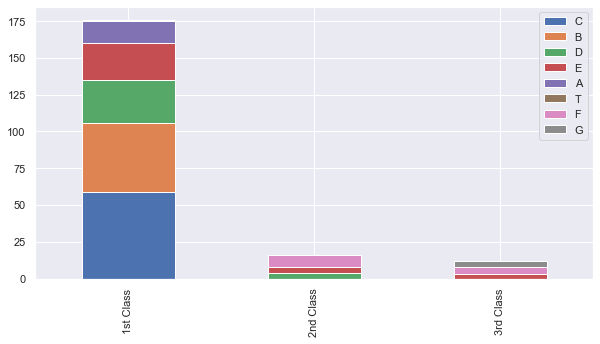

In [47]:
Pclass1 = train_data[train_data['Pclass']==1]['Cabin'].value_counts()
Pclass2 = train_data[train_data['Pclass']==2]['Cabin'].value_counts()
Pclass3 = train_data[train_data['Pclass']==3]['Cabin'].value_counts()

df = pd.DataFrame([Pclass1,Pclass2,Pclass3])
df.index = ['1st Class','2nd Class','3rd Class']
df.plot(kind='bar',stacked=True,figsize=(10,5))

In [48]:
cabin_mapping = {}
higher_case = ['A','B','C','D','E','F','G','T']
temp=0
for i in higher_case:
    cabin_mapping[i]=round(temp*0.4,1)
    temp=temp+1
for dataset in train_test_data:
    dataset['Cabin']=dataset['Cabin'].map(cabin_mapping)

In [49]:
# fillna cabin cols in datasets
train_data['Cabin'].fillna(train_data.groupby('Pclass')['Cabin'].transform('median'),inplace=True)
test_data['Cabin'].fillna(test_data.groupby('Pclass')['Cabin'].transform('median'),inplace=True)

#### Family size

In [50]:
train_data['FamilySize'] = train_data['SibSp'] + train_data['Parch']+1
test_data['FamilySize'] = test_data['SibSp'] + test_data['Parch']+1

(0, 11.0)

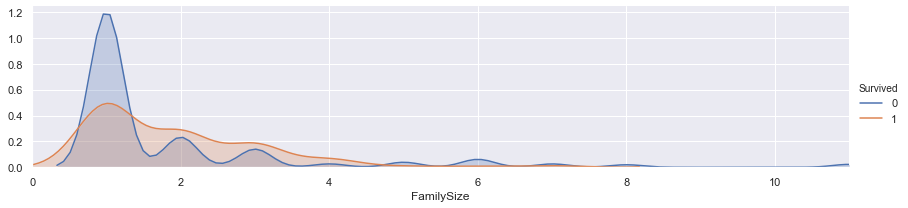

In [51]:
facet = sns.FacetGrid(train_data,hue='Survived',aspect=4)
facet.map(sns.kdeplot,'FamilySize',shade=True)
facet.set(xlim = (0,train_data['FamilySize'].max()))
facet.add_legend()
plt.xlim(0)

In [52]:
family_mapping ={1: 0, 2: 0.4, 3: 0.8, 4: 1.2, 5: 1.6, 6: 2.0, 7: 2.4, 8: 2.8, 9: 3.2, 10: 3.6, 11: 4.0}
for dataset in train_test_data:
    dataset['FamilySize']=dataset['FamilySize'].map(family_mapping)

In [53]:
train_data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,FamilySize
0,1,0,3,0,1.0,1,0,A/5 21171,0.0,2.0,0,0,0.4
1,2,1,1,1,3.0,1,0,PC 17599,2.0,0.8,1,2,0.4
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,0.0,2.0,0,1,0.0
3,4,1,1,1,2.0,1,0,113803,2.0,0.8,0,2,0.4
4,5,0,3,0,2.0,0,0,373450,0.0,2.0,0,0,0.0


In [54]:
features_drop = ['Ticket','SibSp','Parch']
train_data = train_data.drop(features_drop,axis=1)
test_data = test_data.drop(features_drop,axis=1)
train_data = train_data.drop('PassengerId',axis=1)

In [55]:
train = train_data.drop('Survived',axis=1)
target = train_data['Survived']

train.shape, target.shape

((891, 8), (891,))

In [56]:
train.head(10)

,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,FamilySize
0,3,0,1.0,0.0,2.0,0,0,0.4
1,1,1,3.0,2.0,0.8,1,2,0.4
2,3,1,1.0,0.0,2.0,0,1,0.0
3,1,1,2.0,2.0,0.8,0,2,0.4
4,3,0,2.0,0.0,2.0,0,0,0.0
5,3,0,2.0,0.0,2.0,2,0,0.0
6,1,0,3.0,2.0,1.6,0,0,0.0
7,3,0,0.0,2.0,2.0,0,3,1.6
8,3,1,2.0,0.0,2.0,0,2,0.8
9,2,1,0.0,2.0,1.8,1,2,0.4


## Modeling

In [57]:
# Importing Classifier Modules
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

import numpy as np

In [58]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
Survived      891 non-null int64
Pclass        891 non-null int64
Sex           891 non-null int64
Age           891 non-null float64
Fare          891 non-null float64
Cabin         891 non-null float64
Embarked      891 non-null int64
Title         891 non-null int64
FamilySize    891 non-null float64
dtypes: float64(4), int64(5)
memory usage: 62.7 KB


#### Cross Validation (K-fold)

In [59]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
k_fold = KFold(n_splits=10,shuffle=True,random_state=0)

#### KNN

In [60]:
clf = KNeighborsClassifier(n_neighbors =13)
scoring = 'accuracy'
score = cross_val_score(clf, train,target,cv=k_fold,n_jobs=1,scoring=scoring)
print(score)

[0.78888889 0.79775281 0.84269663 0.80898876 0.85393258 0.84269663
 0.80898876 0.79775281 0.84269663 0.82022472]


#### Decision Tree

In [61]:
clf = DecisionTreeClassifier()
scoring = 'accuracy'
score = cross_val_score(clf,train,target,cv=k_fold,n_jobs=1,scoring=scoring)
print(score)

[0.75555556 0.78651685 0.78651685 0.78651685 0.87640449 0.76404494
 0.80898876 0.80898876 0.74157303 0.78651685]


#### Random Forest

In [63]:
clf = RandomForestClassifier(n_estimators=13)
scoring = 'accuracy'
score = cross_val_score(clf,train,target,cv=k_fold,n_jobs=1,scoring=scoring)
print(score)

[0.81111111 0.83146067 0.83146067 0.76404494 0.85393258 0.79775281
 0.82022472 0.79775281 0.73033708 0.79775281]


In [64]:
# Random Forest score
round(np.mean(score)*100,2)

80.36

#### Naive Bayes

In [65]:
clf =GaussianNB()
scoring = 'accuracy'
score = cross_val_score(clf,train,target,cv=k_fold,n_jobs=1,scoring=scoring)
print(score)

[0.83333333 0.73033708 0.76404494 0.74157303 0.71910112 0.80898876
 0.76404494 0.78651685 0.83146067 0.83146067]


In [66]:
#Navie Bayes Score
round(np.mean(score)*100,2)

78.11

#### SVM

In [67]:
clf = SVC()
scoring = 'accuracy'
score = cross_val_score(clf,train,target,cv=k_fold,n_jobs=1,scoring=scoring)
print(score)

C:\Users\dngml\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\dngml\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\dngml\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\dngml\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarni

[0.82222222 0.78651685 0.80898876 0.83146067 0.84269663 0.82022472
 0.83146067 0.85393258 0.80898876 0.84269663]


C:\Users\dngml\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\dngml\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [68]:
round(np.mean(score)*100,2)

82.49

## TESTING

In [69]:
clf = SVC()
clf.fit(train,target)

test = test_data.drop('PassengerId',axis=1).copy()
prediction = clf.predict(test)

C:\Users\dngml\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [72]:
submission = pd.DataFrame({
    "PassengerId": test_data['PassengerId'],
    'Survived': prediction
})
submission.to_csv('submission.csv',index=False)

In [73]:
submission = pd.read_csv('submission.csv')
submission.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
